In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data=pd.read_csv("1. Regression - Module - (Housing Prices).csv")
#To calculate mean of a column with respect to another column

In [2]:
data['Sale Price'].mean()

540198.4357443658

In [3]:
#Consider you are trying to find a relation betweeen condition of the house and the sale price:
#Correlation between the categorical and continuous variable cannot be found so we calculate the mean of the 'Sale Price' with respect to the condition of the house.

C:\Users\HP\AppData\Local\Temp\ipykernel_12064\1473869052.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['condition_sale'][data['Condition of the House'] == str(i)] = data['Sale Price'][data['Condition of the House'] == str(i)].mean()


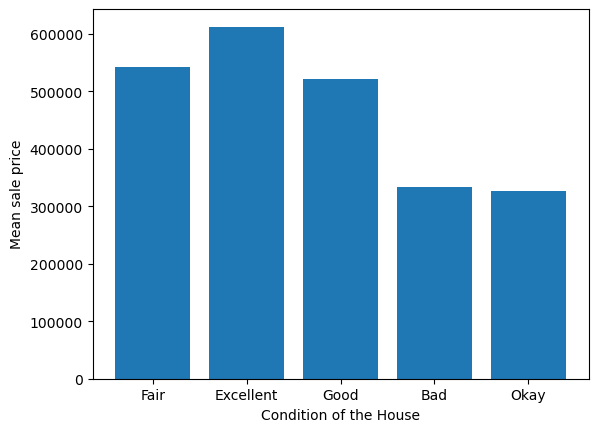

In [4]:
#initialise a new column
data['condition_sale']=0

#Calculating mean based on the condition of the house:
for i in data['Condition of the House'].unique():
    #syntax : data["column_name"]['condition']
    data['condition_sale'][data['Condition of the House'] == str(i)] = data['Sale Price'][data['Condition of the House'] == str(i)].mean()
    
#Plotting the mean sales based on the condition of the house
plt.figure(dpi=100)
plt.bar(data['Condition of the House'].unique(), data['condition_sale'].unique())
plt.xlabel("Condition of the House")
plt.ylabel("Mean sale price")
plt.show()

In [5]:
data['zip_condition_sale']=0
C= "Condition of the House"
Z= 'Zipcode'

#Calculating mean based on the condition of the House and the Zipcode
for i in data[C].unique():
    for j in data[Z].unique():
        #syntax: data['column name'](condition1 and condition2)
        data['zip_condition_sale'][(data[C]==str(i))&(data[Z]==j)] = data['Sale Price'][(data[C]==str(i))&(data[Z]==j)].mean()

len(data['zip_condition_sale'].unique())

C:\Users\HP\AppData\Local\Temp\ipykernel_12064\3148970813.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['zip_condition_sale'][(data[C]==str(i))&(data[Z]==j)] = data['Sale Price'][(data[C]==str(i))&(data[Z]==j)].mean()


281

In [6]:
#using pandas library groupby function :
#syntax of groupby: dataframe.groupby(['List of columns to group by'])['Column to be grouped'].how_to_group()
#mean of sale price with respect to condition of the house and the zipcode
zip_condition_sale=data.groupby(['Condition of the House','Zipcode'])['Sale Price'].mean()
zip_condition_sale

Condition of the House  Zipcode
Bad                     98004.0    1.500000e+06
                        98006.0    3.725000e+05
                        98011.0    2.700000e+05
                        98023.0    1.500000e+05
                        98024.0    1.420000e+05
                                       ...     
Okay                    98155.0    3.601833e+05
                        98166.0    2.165625e+05
                        98168.0    1.809389e+05
                        98178.0    1.750000e+05
                        98198.0    2.705325e+05
Name: Sale Price, Length: 283, dtype: float64

In [7]:
#PANDAS.PIVOT
#using pandas.pivot table function to find mean "Sale Price" wrt "Condition of the house" and "Zipcode"
zipcode_condition_sale2=pd.pivot_table(data,index=["Condition of the House","Zipcode"], values=["Sale Price"], aggfunc=np.mean)
#where dataset=data, index defines how the results will be indexed row-wise, values specify the column we have to perform the action on, aggfunc defines how the result will be aggregated
zipcode_condition_sale2

Sale Price
Condition of the House Zipcode              
Bad                    98004.0  1.500000e+06
                       98006.0  3.725000e+05
                       98011.0  2.700000e+05
                       98023.0  1.500000e+05
                       98024.0  1.420000e+05
...                                      ...
Okay                   98155.0  3.601833e+05
                       98166.0  2.165625e+05
                       98168.0  1.809389e+05
                       98178.0  1.750000e+05
                       98198.0  2.705325e+05

[283 rows x 1 columns]

In [8]:
#slight modification for better representation
zipcode_condition_sale3=pd.pivot_table(data,index=["Zipcode"],columns=["Condition of the House"], values=["Sale Price"], aggfunc=np.mean)
zipcode_condition_sale3

Sale Price                                            \
Condition of the House        Bad     Excellent          Fair          Good   
Zipcode                                                                       
98001.0                       NaN  2.425433e+05  2.927207e+05  2.527446e+05   
98002.0                       NaN  2.216411e+05  2.588868e+05  2.192858e+05   
98003.0                       NaN  3.706800e+05  2.992801e+05  2.809591e+05   
98004.0                 1500000.0  1.236365e+06  1.527265e+06  1.145915e+06   
98005.0                       NaN  8.319500e+05  8.668012e+05  7.669397e+05   
...                           ...           ...           ...           ...   
98177.0                       NaN  8.966313e+05  6.496812e+05  6.665755e+05   
98178.0                       NaN  2.975217e+05  3.094105e+05  3.308419e+05   
98188.0                       NaN  2.853636e+05  2.900059e+05  2.867413e+05   
98198.0                       NaN  3.215235e+05  2.941619e+05  3.154305e+05   
98199.0                       NaN  9.338983e+05  7.604974e+05  7.963811e+05   

                                  
Condition of the House      Okay  
Zipcode                           
98001.0                 356070.0  
98002.0                      NaN  
98003.0                 235500.0  
98004.0                 425000.0  
98005.0                 577750.0  
...                          ...  
98177.0                      NaN  
98178.0                 175000.0  
98188.0                      NaN  
98198.0                 270532.5  
98199.0                      NaN  

[70 rows x 5 columns]

In [9]:
#PANDAS.MAP FUNCTION
#syntax: data['column_name']['condition']
# data['Condition of the House'][data['Condition of the House']=='Fair']='1'
# data['Condition of the House'][data['Condition of the House']=='Okay']='0'
# data['Condition of the House'][data['Condition of the House']=='Bad']='0'
# data['Condition of the House'][data['Condition of the House']=='Good']='1'
# data['Condition of the House'][data['Condition of the House']=='Excellent']='3'
# data['Condition of the House'].unique()
#drawback: repetition of code

In [10]:
#solution:
data['Condition of the House']=data['Condition of the House'].map({'Good':'1', 'Excellent':'3', 'Bad':'0', 'Fair':'1', 'Okay':'0'})
data['Condition of the House'].unique()

array(['1', '3', '0'], dtype=object)

In [11]:
#extracting year from the "date house was sold" into a new column
year=[]
for i in range(len(data["Date House was Sold"])):
    k=data["Date House was Sold"][i].split('-')[-1]
    k='20'+k
    year.append(k)

data['year_sold']=year
data['year_sold'].head()

0    2017
1    2017
2    2016
3    2017
4    2016
Name: year_sold, dtype: object

In [12]:
#Alternative using map function
def year(value):
    return value.split('-')[-1]

#syntax: data['column to operate on'].map(modifier_function)
data['year_sold']=data['Date House was Sold'].map(year)
data['year_sold'].head()

0    17
1    17
2    16
3    17
4    16
Name: year_sold, dtype: object

In [ ]:
# drawback of map = can only be performed on one column at a time
# alternative:

In [13]:
#PANDAS.APPLY()
'''problem statement: A house can be called as a luxury home if two of the three statements are satisfied:
    1."COndtion of the house" is good or excellent
    2."Overall grade" is greater than or equal to 8
    3."Waterfront view" is present'''
#can be done using loops but it is time consuming and takes 7-8 minutes to run
#so we're going to use the pd.apply function
def luxury_home(row):
    count=0
    if row[0]=='Yes':
        count+=1
    if row[1] in['Good' , 'Excellent']:
        count+=1
    if row[2] >=8:
        count+=1
    if count>=2:
        return 'Yes'
    else:
        return 'No'

data['luxury_home']=data[['Waterfront View','Condition of the House','Overall Grade']].apply(luxury_home, axis=1)
data['luxury_home'].unique()

array(['No', 'Yes'], dtype=object)